In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [36]:
df=pd.read_csv('stud.csv')

In [37]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
print("Categories in 'gender' variables: ",end="")
print(df['gender'].unique())

print("categories in 'lunch' variables :  ",end="")
print(df["lunch"].unique())

print("categories in 'race-en=thnicity' variables : ",end="")
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education' variables : ",end="")
print(df['parental_level_of_education'].unique())

print("categories in 'test preparation course' variables : ",end="") 
print(df['test_preparation_course'].unique())

Categories in 'gender' variables: ['female' 'male']
categories in 'lunch' variables :  ['standard' 'free/reduced']
categories in 'race-en=thnicity' variables : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variables : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'test preparation course' variables : ['none' 'completed']


In [39]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [40]:
df.shape

(1000, 8)

In [41]:
X=df.drop(columns=['math_score'],axis=1)


In [42]:
X.shape

(1000, 7)

In [43]:
y=df['math_score']

In [44]:
num_features=X.select_dtypes(exclude="object").columns #select numerical columns

cat_features=X.select_dtypes(include="object").columns #select categorical columns


from sklearn.preprocessing import StandardScaler ,OneHotEncoder 
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer( #The ColumnTransformer expects a tuple of the form (name, transformer, columns)
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)




In [45]:
X = preprocessor.fit_transform(X)

In [46]:
X.shape

(1000, 19)

In [47]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

## Train et Test de la data

In [48]:
X_train ,X_test ,y_train ,y_test =train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [49]:
def evaluate_model(true,predict):
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    r2=r2_score(true,predict)
    rmse=np.sqrt(mse)
    return mae , mse , r2 ,rmse

In [50]:
models={
    "linear regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "catboost":CatBoostRegressor(verbose=False),
    "XGBoost":XGBRegressor(),

}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_r2, model_train_rmse = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_r2, model_test_rmse = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


linear regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.6056
- Mean Absolute Error: 6.0950
- R2 Score: 0.7623


KNN
Model performance for Training set
- Root Mean Squared Error: 5.7092
- Mean Absolute Error: 4.5180
- R2 Score: 0.8554
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2516
- Mean Absolute Error: 5.6160
- R2 Score: 0.7839


catboost
Model performance for Training set
- Root Mean Squared Error: 3.0427
- Mean Absolute Error: 2.4054
- R2 Score: 0.9589
------------------------------

## Results

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,linear regression,0.880433
3,catboost,0.851632
4,XGBoost,0.827797
2,KNN,0.783898
1,Decision Tree,0.762286


## Linear Regression

In [52]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f:" %score)

Accuracy of the model is 88.04:


## Plot y_pred and y_test

Text(0, 0.5, 'predicted values')

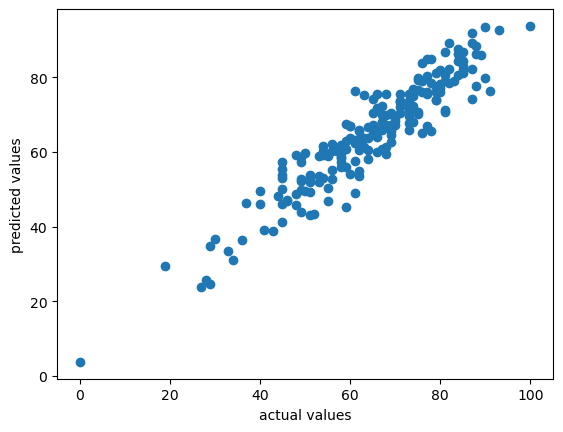

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual values")
plt.ylabel("predicted values")

<Axes: xlabel='math_score'>

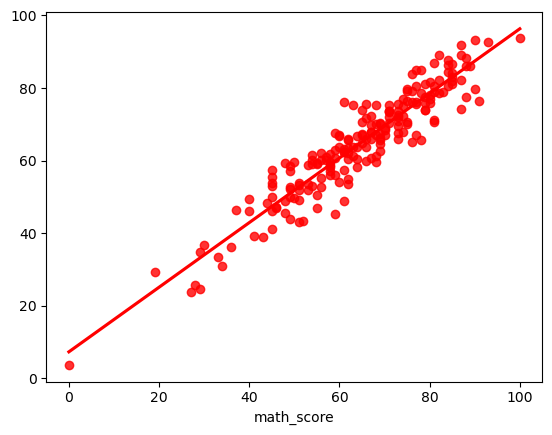

In [54]:
sns.regplot(x=y_test,y=y_pred ,ci=None,color='red')

## Difference between Acual and Predicted values 

In [55]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
